In [2]:
#import the data set from raw data
import pandas as pd
import numpy as np

# Read Dataset

In [3]:
#read the data set
data = pd.read_csv('../raw_data/memotion_dataset_7k/labels.csv')

In [4]:
data.head()

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral


Hacer drop de estas 5 filas o agregar datos.

# EDA

## Dataset Dimension

In [5]:
# Dimesion del dataset
print(data.shape)

(6992, 9)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         6992 non-null   int64 
 1   image_name         6992 non-null   object
 2   text_ocr           6831 non-null   object
 3   text_corrected     6987 non-null   object
 4   humour             6992 non-null   object
 5   sarcasm            6992 non-null   object
 6   offensive          6992 non-null   object
 7   motivational       6992 non-null   object
 8   overall_sentiment  6992 non-null   object
dtypes: int64(1), object(8)
memory usage: 491.8+ KB


## Look for NAs

In [7]:
data.isna().sum()

Unnamed: 0             0
image_name             0
text_ocr             161
text_corrected         5
humour                 0
sarcasm                0
offensive              0
motivational           0
overall_sentiment      0
dtype: int64

In [8]:
# visualizar tex_ocr null
data[data["text_ocr"].isna()]

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
40,40,image_41.PNG,NaN,Me: Has seen every Marvel movie before Endgame:,very_funny,twisted_meaning,slight,motivational,positive
83,83,image_84.png,NaN,X-MEN VS AVENGERS MOVIE? AvengersMeme RUSH .....,very_funny,general,not_offensive,not_motivational,very_positive
114,114,image_115.jpg,NaN,One Does Not Simply Into Mordor Challenge Acce...,very_funny,general,not_offensive,not_motivational,very_positive
283,283,image_284.PNG,NaN,Mike Tyson bought a new computer. It has two b...,funny,not_sarcastic,not_offensive,not_motivational,positive
298,298,image_299.jpg,NaN,OKAY,not_funny,twisted_meaning,not_offensive,not_motivational,neutral
...,...,...,...,...,...,...,...,...,...
6793,6793,image_6794.jpg,NaN,VOTE FOR ME AS PRESIDENT BECAUSE NOW APPARENTL...,not_funny,twisted_meaning,slight,motivational,neutral
6794,6794,image_6795.jpg,NaN,Marco stop trying to confuse the people with ...,not_funny,not_sarcastic,very_offensive,not_motivational,very_positive
6795,6795,image_6796.jpg,NaN,EVERYTHING I FOUGHT FOR occupy Democracy HE WA...,funny,twisted_meaning,very_offensive,motivational,very_negative
6796,6796,image_6797.jpg,NaN,TRUMMEMES.NET WON'T SHAKE HANDS BECAUSE HIS HA...,hilarious,twisted_meaning,slight,not_motivational,very_positive


In [9]:
data[data["text_corrected"].isna()]

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
119,119,image_120.jpg,CHALLENGE ACCEPTED! Friend: You can't honestly...,NaN,not_funny,general,not_offensive,not_motivational,positive
4799,4799,image_4800.jpg,NaN,NaN,very_funny,general,slight,motivational,neutral
6781,6781,image_6782.jpg,NaN,NaN,very_funny,twisted_meaning,not_offensive,not_motivational,positive
6784,6784,image_6785.jpg,NaN,NaN,hilarious,general,not_offensive,not_motivational,positive
6786,6786,image_6787.jpg,NaN,NaN,not_funny,not_sarcastic,very_offensive,motivational,positive


## Drop NAs

In [10]:
#drop column text_ocr
data = data.drop(columns=["text_ocr"])

In [11]:
data.dropna(inplace=True)

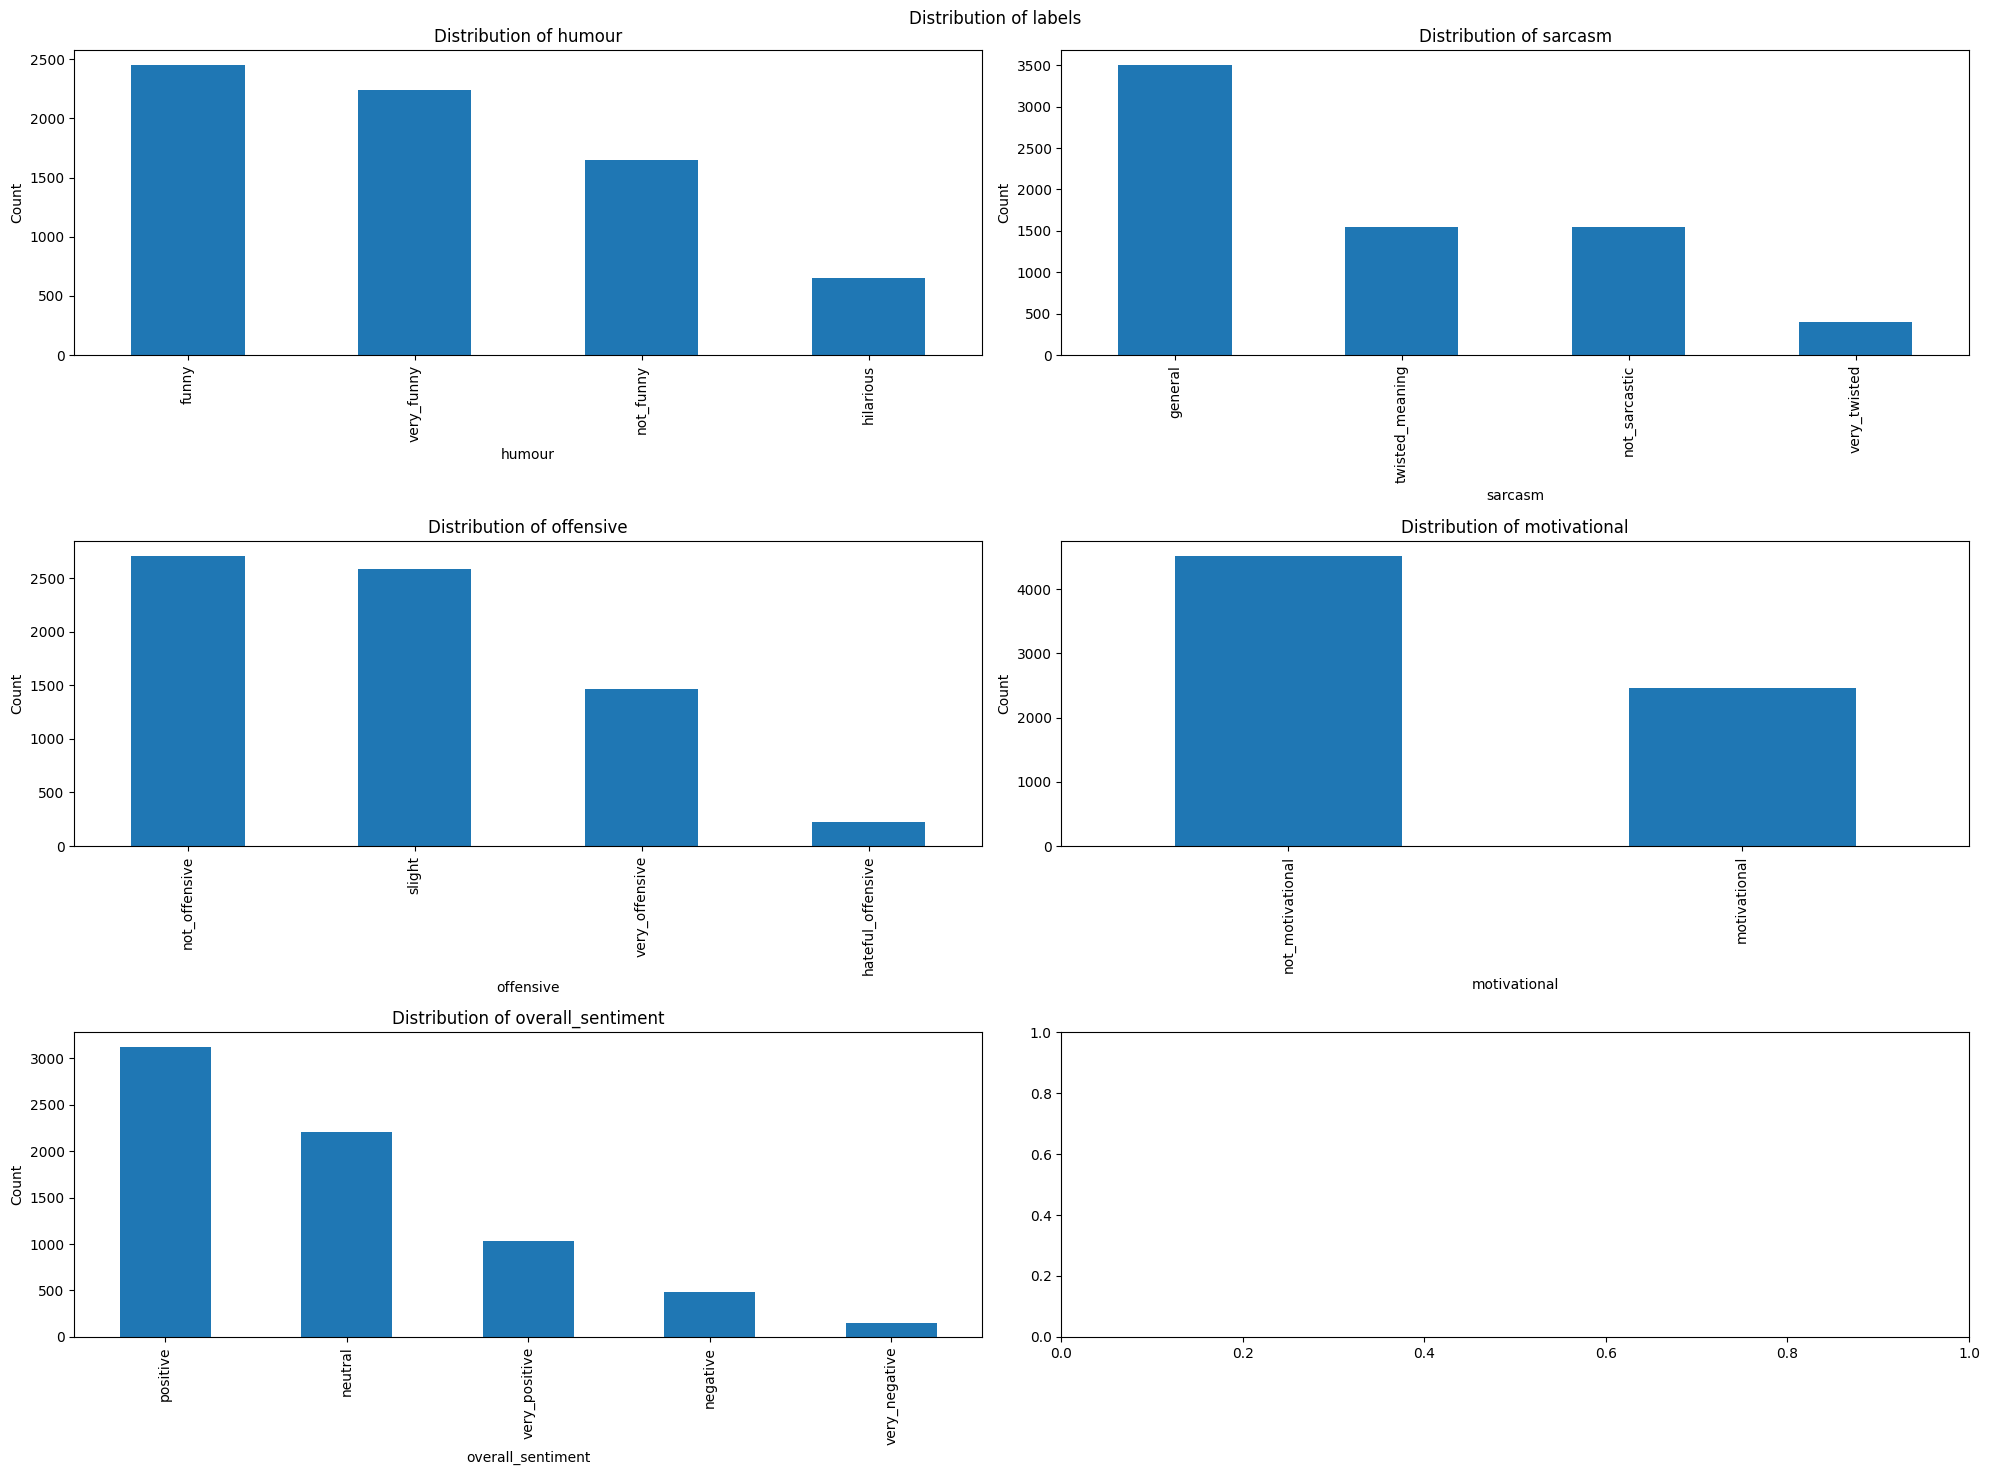

In [12]:
import matplotlib.pyplot as plt
data_columns = ['humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment']
# Hacer subplots
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Distribution of labels')
for i, label in enumerate(data_columns):
    data[label].value_counts().plot(kind='bar', ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Distribution of {label}')
    ax[i//2, i%2].set_xlabel(label)
    ax[i//2, i%2].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [13]:
#drop row's na in text_corrected
data = data.dropna(subset=['text_corrected'])

In [14]:
data.shape

(6987, 8)

In [15]:
data.head()

,Unnamed: 0,image_name,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral


In [16]:
data['overall_sentiment'].unique()

array(['very_positive', 'positive', 'neutral', 'negative',
       'very_negative'], dtype=object)

In [17]:
data['overall_sentiment'].value_counts(normalize=True)

overall_sentiment
positive         0.446973
neutral          0.314870
very_positive    0.147846
negative         0.068699
very_negative    0.021612
Name: proportion, dtype: float64

# Drop column 

In [18]:
data = data.drop(columns=["Unnamed: 0"])

In [19]:
data.head()

,image_name,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral


In [20]:
import re

In [21]:
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [22]:
data['text_cleaned'] = data['text_corrected'].fillna('').apply(clean_text)

In [23]:
data[['text_corrected', 'text_cleaned']].head()

,text_corrected,text_cleaned
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,look there my friend lightyear now all sohalik...
1,The best of #10 YearChallenge! Completed in le...,the best of yearchallenge completed in less th...
2,Sam Thorne @Strippin ( Follow Follow Saw every...,sam thorne strippin follow follow saw everyone...
3,10 Year Challenge - Sweet Dee Edition,year challenge sweet dee edition
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,year challenge with no filter hilarious year c...


In [24]:
data = data.drop(columns=["text_corrected"])

In [25]:
data.head()

,image_name,humour,sarcasm,offensive,motivational,overall_sentiment,text_cleaned
0,image_1.jpg,hilarious,general,not_offensive,not_motivational,very_positive,look there my friend lightyear now all sohalik...
1,image_2.jpeg,not_funny,general,not_offensive,motivational,very_positive,the best of yearchallenge completed in less th...
2,image_3.JPG,very_funny,not_sarcastic,not_offensive,not_motivational,positive,sam thorne strippin follow follow saw everyone...
3,image_4.png,very_funny,twisted_meaning,very_offensive,motivational,positive,year challenge sweet dee edition
4,image_5.png,hilarious,very_twisted,very_offensive,not_motivational,neutral,year challenge with no filter hilarious year c...
